In [4]:
import pandas as pd
import numpy as np
d=pd.read_csv("/kdd_train.csv")

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
d.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [7]:
d.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
125968,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125969,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125972,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [8]:
d["labels"] = d["labels"].replace(['neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], 'attack')

In [9]:
d["labels"].unique()

array(['normal', 'attack'], dtype=object)

In [10]:
d=d.dropna()

In [11]:
d["labels"].unique()

array(['normal', 'attack'], dtype=object)

In [12]:
d.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [13]:
d.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


In [14]:
x = d.iloc[:, :-1].values
y = d.iloc[:, 41].values

In [15]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#first applying label encoding to convert strings to number.
#display(x[:,2])
labelencoder_x_1 = LabelEncoder()
labelencoder_x_2 = LabelEncoder()
labelencoder_x_3 = LabelEncoder()
x[:, 1] = labelencoder_x_1.fit_transform(x[:, 1])
x[:, 2] = labelencoder_x_2.fit_transform(x[:, 2])
x[:, 3] = labelencoder_x_3.fit_transform(x[:, 3])

In [ ]:
#labelencoder_y = LabelEncoder()
#y = labelencoder_y.fit_transform(y)

In [16]:
display(x)

array([[0, 1, 20, ..., 0.0, 0.05, 0.0],
       [0, 2, 44, ..., 0.0, 0.0, 0.0],
       [0, 1, 49, ..., 1.0, 0.0, 0.0],
       ...,
       [0, 1, 54, ..., 0.0, 0.01, 0.0],
       [0, 1, 30, ..., 1.0, 0.0, 0.0],
       [0, 1, 20, ..., 0.0, 0.0, 0.0]], dtype=object)

In [17]:
display(set(y))

{'attack', 'normal'}

Standardize the variables
Note: Column names to be appended after performing Standardization

In [18]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x = pd.DataFrame(ss.fit_transform(x), columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate'])

Picking 1000 samples randomly

In [19]:
x = x.sample(n = 1000, random_state = 12).copy()
x = x.reset_index(drop=True)
x.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110249,-0.124706,-0.442083,0.751111,-0.007712,-0.001636,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.674790,1.258754,1.066401,-0.439078,-0.286020,0.332769,-0.639532,-0.624871,-0.387635,-0.376387
1,-0.110249,-0.124706,-0.442083,-0.736235,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,0.734343,-0.448527,-0.581898,-0.333214,-0.447834,-0.289103,1.608759,1.618955,-0.387635,-0.376387
2,-0.110249,-0.124706,-0.442083,0.751111,-0.007712,-0.004857,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.301828,1.258754,1.066401,-0.439078,-0.415471,-0.022587,-0.639532,-0.624871,-0.387635,-0.376387
3,-0.110249,-0.124706,-0.686785,0.751111,-0.007728,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.604230,-0.403361,0.865933,0.037311,2.464826,-0.022587,-0.639532,-0.624871,-0.387635,-0.376387
4,-0.109481,-0.124706,1.393183,0.751111,-0.006969,-0.004836,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.777666,0.499962,0.776835,-0.227350,-0.447834,-0.200265,-0.639532,-0.624871,-0.387635,-0.376387


Extracting dst_host_serror_rate feature in a new Dataframe

In [20]:
x1 = x.iloc[:, 37].values
x1 = pd.DataFrame(x1,columns=['dst_host_serror_rate'])


Extracting serror_rate feature in a new Dataframe

In [21]:
x2 = x.iloc[:, 24].values
x2 = pd.DataFrame(x2,columns=['serror_rate'])

Concatenate 2 Dataframes holding 2 different conditional attributes

In [22]:
x3 = pd.concat([x1,x2],axis=1)
x3 = pd.DataFrame(x3)

In [23]:
x3.head()

,dst_host_serror_rate,serror_rate
0,-0.639532,-0.637209
1,1.608759,1.602664
2,-0.639532,-0.637209
3,-0.639532,-0.637209
4,-0.639532,-0.637209


Data Visualization

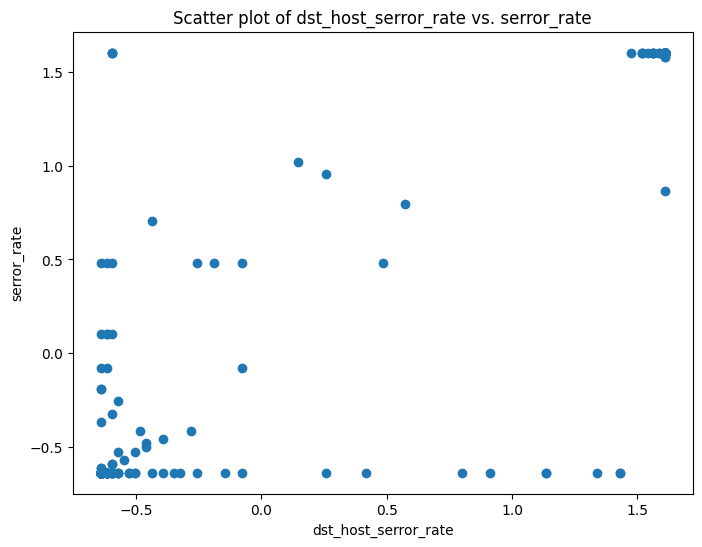

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x3.dst_host_serror_rate, x3.serror_rate)
plt.xlabel('dst_host_serror_rate')
plt.ylabel('serror_rate')
plt.title('Scatter plot of dst_host_serror_rate vs. serror_rate')
plt.show()

Train and fit a K-means clustering model

In [25]:
from sklearn.cluster import KMeans

In [26]:
km = KMeans(n_clusters=6)
model = km.fit(x3)

Cluster visualization

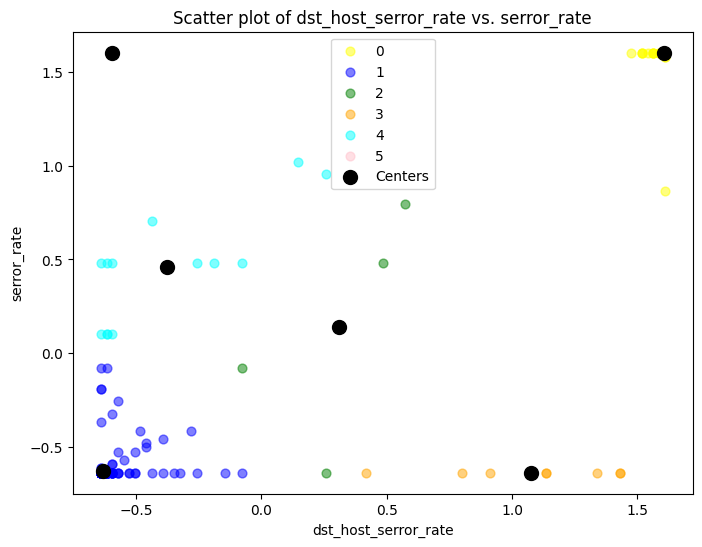

In [27]:
colors=["yellow","blue","green","orange","aqua","pink"]
# figure setting
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(x3[model.labels_==i].dst_host_serror_rate, x3[model.labels_==i].serror_rate, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering",size=20)
plt.xlabel("dst_host_serror_rate")
plt.ylabel("serror_rate")
plt.title('Scatter plot of dst_host_serror_rate vs. serror_rate')
plt.legend()
plt.show()

Distance calculation

In [28]:
def distance_from_center(dst_host_serror_rate, serror_rate, label):
    '''
    Calculate the Euclidean distance between a data point and the center of its cluster.
:param float dst_host_serror_rate: the standardized dst_host_serror_rate of the data point
    :param float serror_rate: the standardized serror_rate of the data point
    :param int label: the label of the cluster
    :rtype: float
    :return: The resulting Euclidean distance
    '''
    center_dst_host_serror_rate =  model.cluster_centers_[label,0]
    center_serror_rate =  model.cluster_centers_[label,1]
    distance = np.sqrt((dst_host_serror_rate - center_dst_host_serror_rate) ** 2 + (serror_rate - center_serror_rate) ** 2)
    return np.round(distance, 3)
x3['label'] = model.labels_
x3['distance'] = distance_from_center(x3.dst_host_serror_rate, x3.serror_rate, x3.label)

Defining Outliers

In [29]:
outliers_idx = list(x3.sort_values('distance', ascending=False).head(10).index)
outliers = x3[x3.index.isin(outliers_idx)]
print(outliers)

     dst_host_serror_rate  serror_rate  label  distance
130             -0.639532    -0.077241      1     0.554
178              0.259784    -0.637209      2     0.780
230             -0.077459    -0.637209      1     0.554
432              0.147370     1.020297      4     0.766
619              0.417165    -0.637209      3     0.658
657             -0.617049    -0.077241      1     0.554
669              1.608759     0.863506      0     0.736
743              0.259784     0.953101      4     0.804
842             -0.144908    -0.637209      1     0.487
859              0.574545     0.796310      2     0.706


Cluster visualization along with Outliers

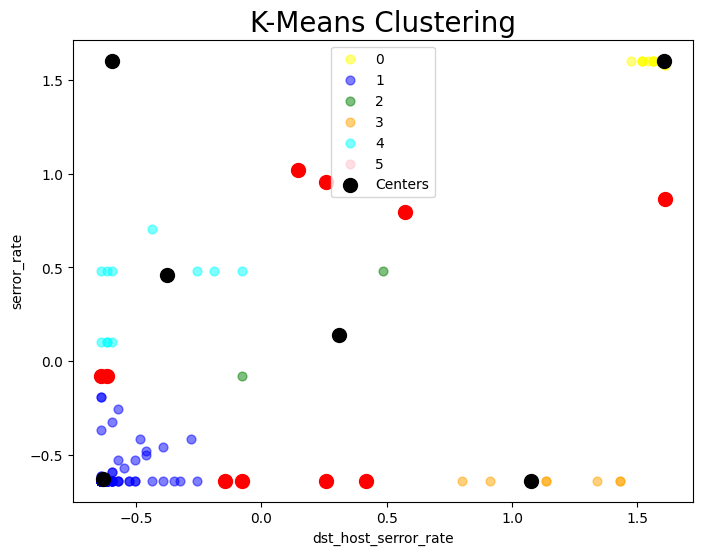

In [30]:
# figure setting
colors=["yellow","blue","green","orange","aqua","pink"]
plt.figure(figsize=(8,6))
for i in range(np.max(model.labels_)+1):
    plt.scatter(x3[model.labels_==i].dst_host_serror_rate, x3[model.labels_==i].serror_rate, label=i, c=colors[i], alpha=0.5, s=40)
plt.scatter(outliers.dst_host_serror_rate, outliers.serror_rate, c='red', s=100)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], label='Centers', c="black", s=100)
plt.title("K-Means Clustering",size=20)
plt.xlabel("dst_host_serror_rate")
plt.ylabel("serror_rate")
#plt.title('Scatter plot')
plt.legend()
plt.show()

For cluster = 1, SSE/WCSS is 1959.3791376398867
For cluster = 2, SSE/WCSS is 63.4803164497605
For cluster = 3, SSE/WCSS is 39.30944505684976
For cluster = 4, SSE/WCSS is 16.769972020732496
For cluster = 5, SSE/WCSS is 10.99785791040773
For cluster = 6, SSE/WCSS is 9.091732841994038
For cluster = 7, SSE/WCSS is 7.251887219550845
For cluster = 8, SSE/WCSS is 3.765482919357069
For cluster = 9, SSE/WCSS is 3.500753515742598


<ipython-input-33-07e1cc22df1a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = kmeans.labels_
<ipython-input-33-07e1cc22df1a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['clusters'] = kmeans.labels_
<ipython-input-33-07e1cc22df1a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

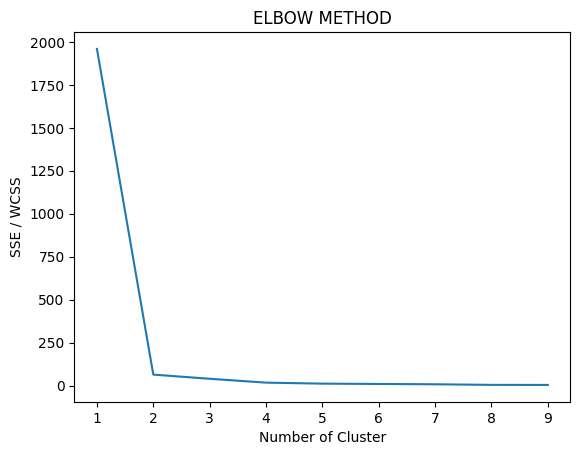

In [33]:

# ELBOW METHOD

# How many clusters should we choose ? - Elbow Method
# Select the elbow point for number of clusters
data = x3[['dst_host_serror_rate', 'serror_rate']]

sse = {}

for k in range(1,10):
  kmeans = KMeans(n_clusters=k,max_iter=100).fit(data)
  data['clusters'] = kmeans.labels_
  sse[k] = kmeans.inertia_
  print("For cluster = {}, SSE/WCSS is {}".format(k, sse[k]))

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE / WCSS")
plt.title("ELBOW METHOD")
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

In [34]:
# Silhouette Score

data = x3[['dst_host_serror_rate', 'serror_rate']]

for n_clusters in range(2, 11):  # Start from 2 clusters, as 1 cluster is not meaningful for Silhouette Score
  kmeans = KMeans(n_clusters=n_clusters, max_iter=100).fit(data)  # Use n_clusters, not k
  label = kmeans.labels_
  sil_coeff = silhouette_score(data, label, metric='euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(n_clusters, sil_coeff))

print('\n It is same for every cluster, so choose from Elbow Method')

NameError: name 'silhouette_score' is not defined